# Getting Started

A translation of the [RooFit Users Manual](ftp://root.cern.ch/root/doc/RooFit_Users_Manual_2.91-33.pdf) seen on January 2016 into Python using ROOT 6.06/00 with enable-roofit.

Tags should include. pyROOT, python, RooFit, RooStats, iPython, jupyter, ROOT and more.
This page specifically features, working with TTrees, numpy, RooDataHist, RooRealVar and I add these since the links that I found when googling these links prooved invaluable.

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/00


rootnotes is included to help facilitate in line plotting. The following lines (including the rootnotes hint was taken from [Kyle Cranmer's website](http://theoryandpractice.org/2014/03/roofit-statistical-modeling-language-in-ipython-notebook)

In [2]:
import rootnotes
c1=rootnotes.default_canvas()

In [3]:
w = ROOT.RooWorkspace()
w.factory('Gaussian::g(x[-5,5],mu[-3,3],sigma[1])')
w.factory('Exponential::e(x,tau[-.5,-3,0])')
w.factory('SUM::model(s[50,0,100]*g,b[100,0,1000]*e)')
w.Print() 


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt


RooWorkspace()  contents

variables
---------
(b,mu,s,sigma,tau,x)

p.d.f.s
-------
RooExponential::e[ x=x c=tau ] = 1
RooGaussian::g[ x=x mean=mu sigma=sigma ] = 1
RooAddPdf::model[ s * g + b * e ] = 1



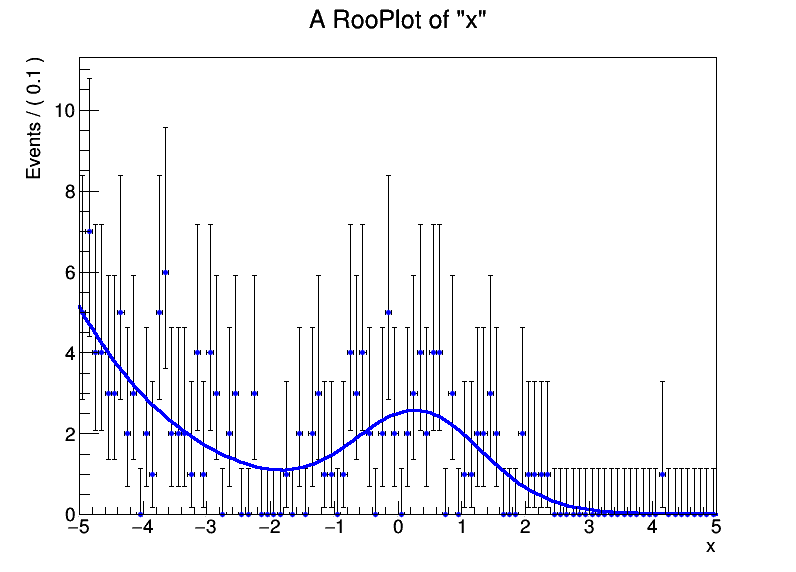

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (g,e)


Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmpy4IRqW.png has been created


In [4]:
x = w.var('x')
pdf = w.pdf('model')
frame = x.frame()
data = pdf.generate(ROOT.RooArgSet(x))
data.plotOn(frame)
fitResult = pdf.fitTo(data,ROOT.RooFit.Save(),ROOT.RooFit.PrintLevel(-1))
pdf.plotOn(frame)
frame.Draw()
c1

## Building a Model

A key concept is mathematical correspondances with objects.
* RooRealVar expresses a variable
* RooAbsReal expresses a function
* RooAbsPdf expresses a probability density function

In [5]:
x = ROOT.RooRealVar("x","x",-10,10)
mean = ROOT.RooRealVar("mean","Mean of Gaussian",-10,10)
sigma = ROOT.RooRealVar("sigma","Width of Gaussian",3,-10,10)

gauss = ROOT.RooGaussian("gauss","gauss(x,mean,sigma)",x,mean,sigma)

Models are built from variables and pdfs. The mathematical coherance is key.

## Visualising a Model

In statistics the angle at which you view your data is important. Roostats uses frames to do this. First a frame is created then a model is fitted onto the frame. This frame (with model) is then drawn on a ROOT TCanvas.

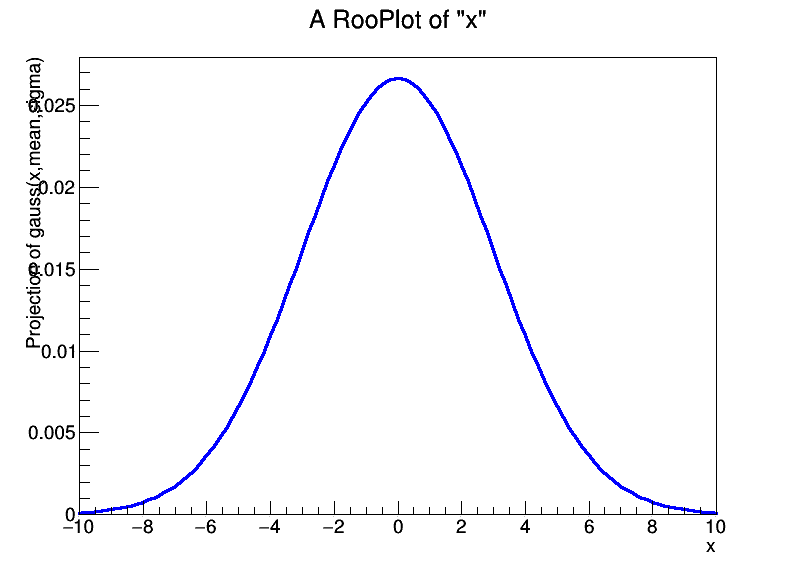

Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmp6i45E3.png has been created


In [6]:
xframe = x.frame()
gauss.plotOn(xframe)
xframe.Draw()
c1

A frame contains a snapshot of the item as soon as it is plotted onto it. It can contain different plots of the same distribution.

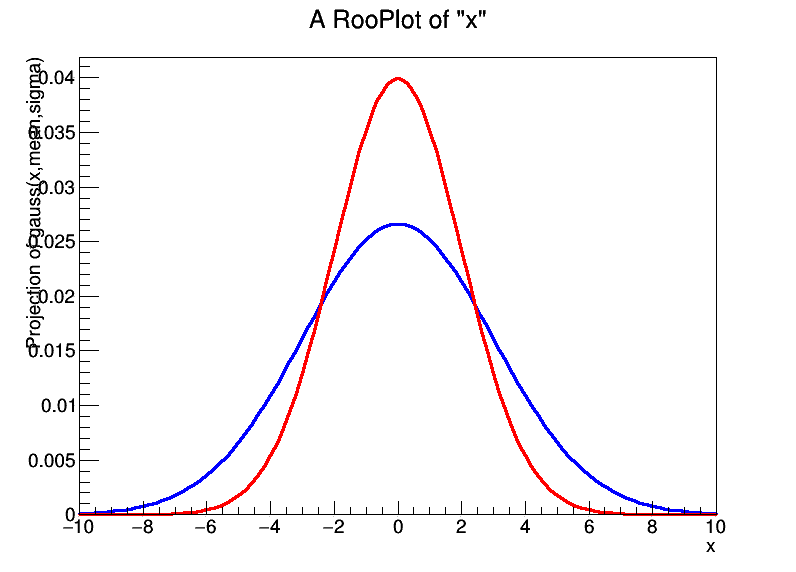

Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmplWp5v3.png has been created


In [7]:
newframe = x.frame()
gauss.plotOn(newframe)
sigma.setVal(2)
gauss.plotOn(newframe,ROOT.RooFit.LineColor(2))
newframe.Draw()
c1

Using notebooks makes it difficult to plot several frames, since the notebook must be rendered at the correct order.

Interestingly, real values must be set using the setVal() function not simply to a float as in C++

## Importing Data

Data usually come either binned or unbinned. 

In [8]:
h1 = ROOT.TH1D("h1","gaussian histogram",20,-10,10)
h1.FillRandom("gaus",10000)
h2 = ROOT.TH1D("h2","gaussian histogram",20,-10,10)
for i in range(10000): h2.Fill(ROOT.gRandom.Gaus(0,3))

In [9]:
x = ROOT.RooRealVar("x","x",-10,10)
l = ROOT.RooArgList(x)
data = ROOT.RooDataHist("data", "data set with x1", l, h1)
data2 = ROOT.RooDataHist("data2", "data set with x2", l, h2)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data): fit range of variable x expanded to nearest bin boundaries: [-10,10] --> [-10,10]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data2): fit range of variable x expanded to nearest bin boundaries: [-10,10] --> [-10,10]


For some reason, the RooDataHist wont take the RooRealVar as an argument. As such we add it to the RooArgList. 

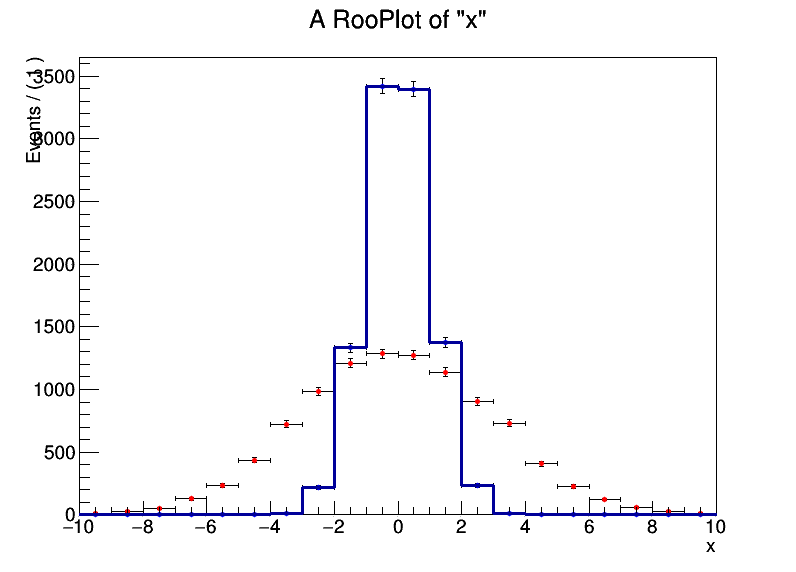

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 9989 will supercede previous event count of 10000 for normalization of PDF projections


Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmpYaV6ta.png has been created


In [10]:
xframe = x.frame()
data.plotOn(xframe)
data2.plotOn(xframe,ROOT.RooFit.MarkerColor(2))
xframe.Draw()
h1.Draw("same")
c1

In [11]:
import numpy as np
tree = ROOT.TTree("tree","tree")
x = np.zeros(1,dtype=float)
tree.Branch("x",x,'x/D')
for i in range(10000):
    x[0] = np.random.normal(0,3,1)
    tree.Fill()

In [12]:
x = ROOT.RooRealVar("x","x",-10,10)
data = ROOT.RooDataSet("data","dataset from tree",tree,ROOT.RooArgSet(x))

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 7 out of range events


As can be seen the benefits of using python mean that we can interface ROOT and numpy. Both of which is And now to plot!

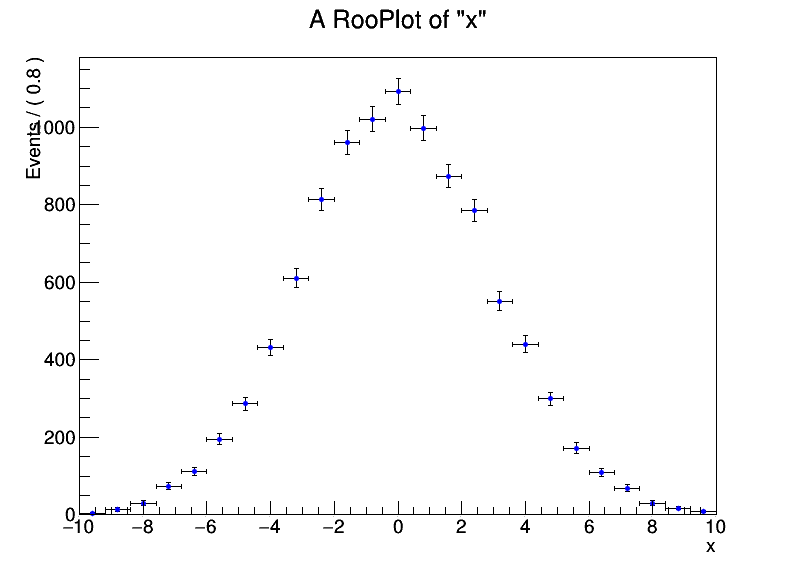

Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmpZ6ON4p.png has been created


In [13]:
xframe = x.frame()
data.plotOn(xframe,ROOT.RooFit.Binning(25))
xframe.Draw()
c1

Generally RooFit can use binned and unbinned data interchangeably since they both (RooDataSet and RooDataHist) inherit from the same class.

## Fitting a Model to data

Usually in data analysis we want to test how well the data conforms to our hypothesis, in real terms this means comparing the results of the two and testing how similar they look. In order to do this we must create a test statistic. the most common choices are $\chi^2 \text{ and }-\log(likelihood)$

The default fit in RooFit is the maximum likelihood fit that matches the data's binned or unbinned status. Since RooFit is a ROOT implementation the minimisation is done by MINUIT through is TMinuit implementation.

The easiest fit is performed by the fitTo() method of class RooAbsPdf. Which builds a -log(L) function from the gauss function and the given dataset, then MINUIT minimizes it and estimates the errors. 

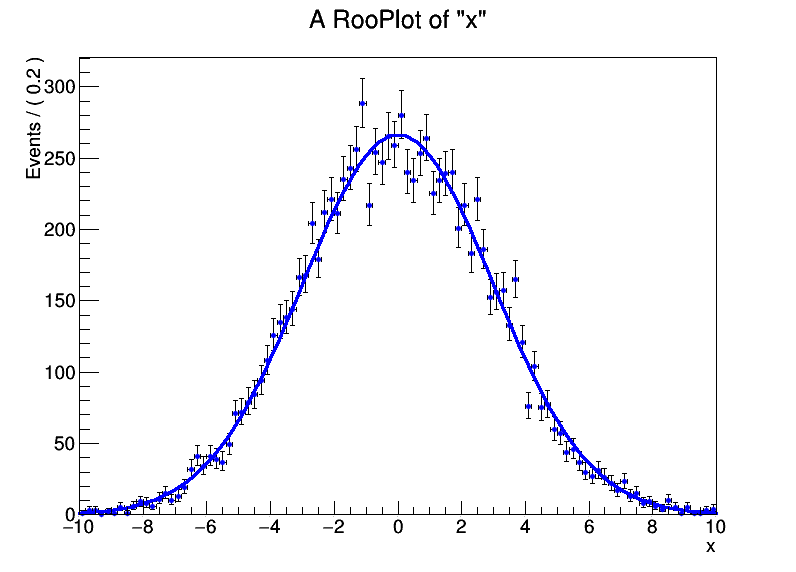

Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmpUCtuvN.png has been created


In [14]:
x = ROOT.RooRealVar("x","x",-10,10)
mean = ROOT.RooRealVar("mean","Mean of Gaussian",0,-10,10)
sigma = ROOT.RooRealVar("sigma","Width of Gaussian",3,-10,10)
gauss = ROOT.RooGaussian("gauss","gauss(x,mean,sigma)",x,mean,sigma)

data = gauss.generate(ROOT.RooArgSet(x),10000)

xframe = x.frame()
data.plotOn(xframe, ROOT.RooLinkedList())
gauss.plotOn(xframe)
xframe.Draw()
c1

In this example the generate function is used to generate a data set from the function provided.

In [15]:
result = gauss.fitTo(data,ROOT.RooFit.PrintLevel(-1))

In [16]:
mean.Print()
sigma.Print()

RooRealVar::mean = -0.0270331 +/- 0.0300511  L(-10 - 10) 
RooRealVar::sigma = 2.99012 +/- 0.021816  L(-10 - 10) 


These can be set to constant

In [17]:
mean.setConstant(ROOT.kTRUE)
sigma.setConstant(ROOT.kFALSE)

And the ranges modified.

In [18]:
sigma.setRange(0.1,3)
result = gauss.fitTo(data,ROOT.RooFit.Minos(ROOT.kTRUE),ROOT.RooFit.PrintLevel(-1))

In [19]:
gauss.fitTo(data,ROOT.RooFit.Range(-5,5),ROOT.RooFit.PrintLevel(-1))

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit' created with bounds [-5,5]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_gauss_gaussData) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForfit' created with bounds [-10,10]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_gauss_gaussData' created with bounds [-5,5]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_gauss_gaussData) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 


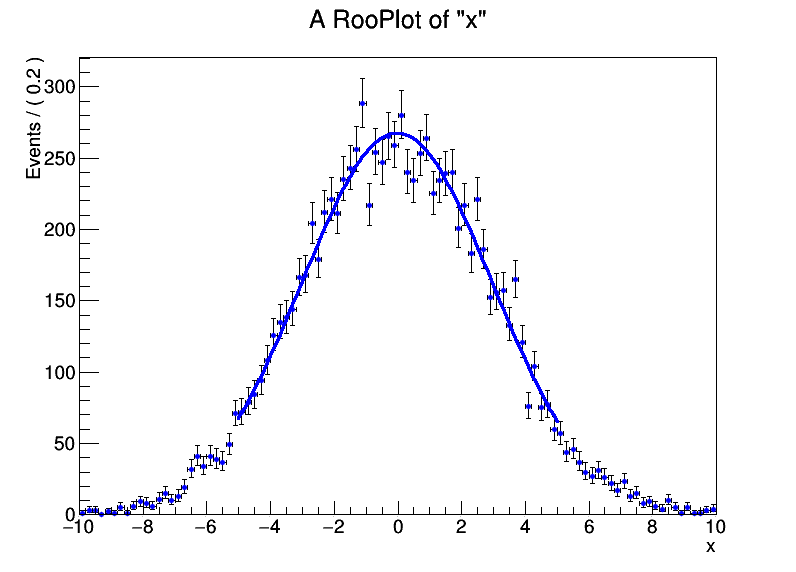

[#1] INFO:Plotting -- RooAbsPdf::plotOn(gauss) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(gauss) only plotting range 'fit_nll_gauss_gaussData'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(gauss) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_gauss_gaussData'


Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmpaZCp0t.png has been created


In [20]:
xframe = x.frame()
data.plotOn(xframe,ROOT.RooLinkedList())
gauss.plotOn(xframe)
xframe.Draw()
c1

## Calculating integrals over models

In [21]:
intGaussX = gauss.createIntegral(ROOT.RooArgSet(x))
intGaussX.getVal()

7.513428714533545

Since intGaussX is a RooAbsReal 

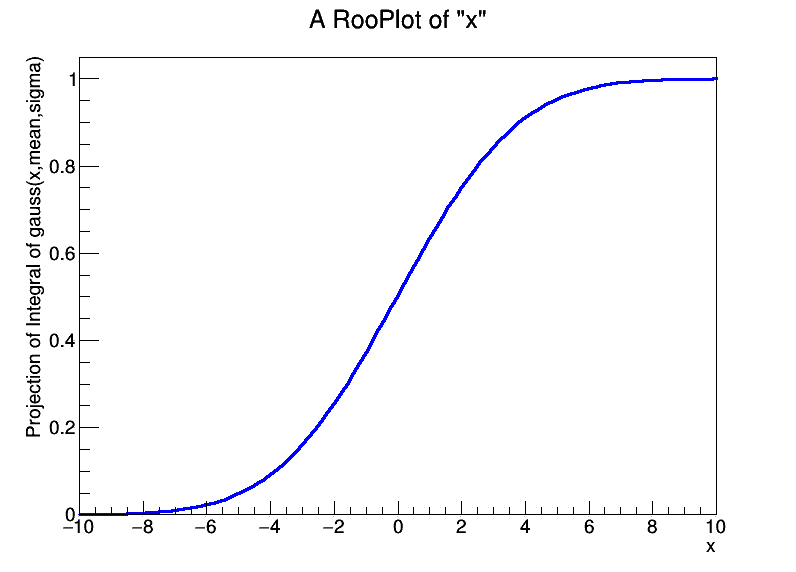

Info in <TCanvas::Print>: png file /var/folders/sk/t5qncxyd1gjg61whtngc502r0000gn/T/tmpuwDpX0.png has been created


In [22]:
cdf = gauss.createCdf(ROOT.RooArgSet(x))
xframe = x.frame()
cdf.plotOn(xframe)
xframe.Draw()
c1